# Compare Run Times

## Relative speed of Monte Carlo and Spectral Radius Methods

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe

In [45]:
%run src/ssy_discretized_test.py

In [46]:
s = SSY()

In [47]:
def discrete_call(D):
    return test_val_spec_rad(s, K=D, I=D, J=D)
    

In [48]:
def continuous_call(D):
    f = mc_factory(s, K=D, I=D, J=D)
    return f(n=1000, m=1000)

In [51]:
%time discrete_call(10)

CPU times: user 4.84 s, sys: 3.33 ms, total: 4.84 s
Wall time: 3.98 s


0.9991631792726975

In [52]:
%time continuous_call(10)

CPU times: user 885 ms, sys: 33 µs, total: 885 ms
Wall time: 756 ms


0.9995423120868748

In [85]:
comparisons = []
calls = [discrete_call, continuous_call]
results = np.empty(2)
D1, D2 = 3, 20

for d in range(D1, D2):
    for i, call in enumerate(calls):
        qe.tic()
        call(d)
        results[i] = qe.toc(verbose=False)
    comparisons.append(results[0] / results[1])

In [86]:
comparisons

[0.007996138228696369,
 0.025795350840916623,
 0.08300613067663155,
 0.2397820735921793,
 0.6828689932254224,
 1.38041893769099,
 2.7802424867997937,
 5.24967877041343,
 10.558948140339123,
 16.617188259743628,
 26.78321596672383,
 42.586084968168755,
 74.95614994468251,
 105.05914246191166,
 148.90887805314728,
 222.75608183559268,
 375.303425627946]

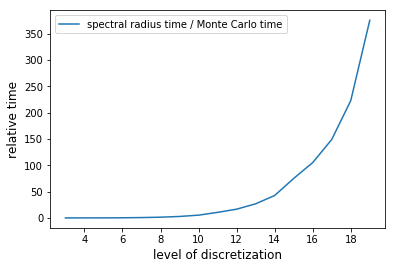

In [87]:
fig, ax = plt.subplots()
ax.plot(range(D1, D2), np.array(comparisons), label="spectral radius time / Monte Carlo time")
ax.set_xlabel("level of discretization", fontsize=12)
ax.set_ylabel("relative time", fontsize=12)
ax.legend()
plt.show()